In [3]:

import pandas as pd
from sklearn.model_selection import train_test_split
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import HillClimbSearch, BicScore, MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
from sklearn.metrics import classification_report, accuracy_score


data = pd.read_csv('/home/dhruv.kumar/Roamify/Muthuraj/Combined_ECG_Features.csv')

top_features = [
    'value__quantile__q_0.9',
    'ST Segment Amplitude Mean',
    'QT Interval Mean',
    'QT Interval SD',
    'PR_duration',
    'value__ratio_beyond_r_sigma__r_3',
    'value__ratio_beyond_r_sigma__r_0.5',
    'value__partial_autocorrelation__lag_4',
    'Spectral Entropy',
    'value__quantile__q_0.6',
    'MFCC_12',
    'value__partial_autocorrelation__lag_3',
    'value__median',
    'QRS_duration',
    'value__benford_correlation',
    'ST Segment Duration Mean',
    'MFCC_10',
    'value__ratio_beyond_r_sigma__r_1',
    'value__quantile__q_0.1',
    'value__agg_autocorrelation__f_agg_"var"__maxlag_40',
    'value__ratio_beyond_r_sigma__r_1.5',
    'value__agg_autocorrelation__f_agg_"median"__maxlag_40',
    'ST Segment Duration SD',
    'value__ratio_beyond_r_sigma__r_2.5',
    'value__quantile__q_0.4',
    'value__quantile__q_0.7',
    'MFCC_11',
    'value__kurtosis',
    'value__minimum',
    'RR Interval Min',
    'Mean Frequency',
    'MFCC_2',
    'value__agg_autocorrelation__f_agg_"mean"__maxlag_40',
    'MFCC_8',
    'value__skewness',
    'HRV_RMSSD',
    'Phase Locking Value',
    'RR Interval RMSSD',
    'value__fft_coefficient__attr_"abs"__coeff_17'
]

top_features = [feature for feature in top_features if feature in data.columns]
print(top_features)

selected_features = top_features + ['Label']
data = data[selected_features]

for col in top_features:
    data[col] = pd.qcut(data[col], q=3, labels=["Low", "Normal", "High"])

X = data.drop(columns=['Label'])
y = data['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

train_data = pd.concat([X_train, y_train], axis=1)

hc = HillClimbSearch(train_data)
best_model = hc.estimate(scoring_method=BicScore(train_data))

bn_model = BayesianNetwork(best_model.edges())
print("Bayesian Network Edges:", bn_model.edges())
bn_model.fit(train_data, estimator=MaximumLikelihoodEstimator)

infer = VariableElimination(bn_model)

y_pred = []
for _, row in X_test.iterrows():
    evidence = row.to_dict()
    evidence = {k: v for k, v in evidence.items() if k in bn_model.nodes()}
    try:
        query_result = infer.map_query(variables=['Label'], evidence=evidence)
        y_pred.append(query_result['Label'])
    except ValueError as e:
        print(f"Skipping row due to missing node in graph: {e}")
        y_pred.append(None)

valid_predictions = [(yt, yp) for yt, yp in zip(y_test, y_pred) if yp is not None]
if valid_predictions:
    y_test_valid, y_pred_valid = zip(*valid_predictions)
else:
    print("No valid predictions made.")
    y_test_valid, y_pred_valid = [], []

if y_test_valid and y_pred_valid:
    print("Accuracy:", accuracy_score(y_test_valid, y_pred_valid))
    print("\nClassification Report:")
    print(classification_report(y_test_valid, y_pred_valid))
else:
    print("Model could not generate valid predictions.")

['value__quantile__q_0.9', 'ST Segment Amplitude Mean', 'QT Interval Mean', 'QT Interval SD', 'PR_duration', 'value__ratio_beyond_r_sigma__r_3', 'value__ratio_beyond_r_sigma__r_0.5', 'value__partial_autocorrelation__lag_4', 'Spectral Entropy', 'value__quantile__q_0.6', 'MFCC_12', 'value__partial_autocorrelation__lag_3', 'value__median', 'QRS_duration', 'value__benford_correlation', 'ST Segment Duration Mean', 'MFCC_10', 'value__ratio_beyond_r_sigma__r_1', 'value__quantile__q_0.1', 'value__agg_autocorrelation__f_agg_"var"__maxlag_40', 'value__ratio_beyond_r_sigma__r_1.5', 'value__agg_autocorrelation__f_agg_"median"__maxlag_40', 'ST Segment Duration SD', 'value__ratio_beyond_r_sigma__r_2.5', 'value__quantile__q_0.4', 'value__quantile__q_0.7', 'MFCC_11', 'value__kurtosis', 'value__minimum', 'RR Interval Min', 'Mean Frequency', 'MFCC_2', 'value__agg_autocorrelation__f_agg_"mean"__maxlag_40', 'MFCC_8', 'value__skewness', 'HRV_RMSSD', 'Phase Locking Value', 'RR Interval RMSSD', 'value__fft_c

  0%|          | 113/1000000 [00:25<62:30:31,  4.44it/s] 


Bayesian Network Edges: [('value__quantile__q_0.9', 'QT Interval SD'), ('value__quantile__q_0.9', 'Label'), ('value__quantile__q_0.9', 'ST Segment Amplitude Mean'), ('value__quantile__q_0.9', 'ST Segment Duration SD'), ('value__quantile__q_0.9', 'QT Interval Mean'), ('QT Interval SD', 'ST Segment Duration SD'), ('QT Interval SD', 'QT Interval Mean'), ('QT Interval Mean', 'RR Interval Min'), ('QT Interval Mean', 'ST Segment Duration SD'), ('RR Interval Min', 'value__fft_coefficient__attr_"abs"__coeff_17'), ('RR Interval Min', 'PR_duration'), ('value__ratio_beyond_r_sigma__r_3', 'value__ratio_beyond_r_sigma__r_1'), ('value__ratio_beyond_r_sigma__r_3', 'ST Segment Duration Mean'), ('value__ratio_beyond_r_sigma__r_3', 'value__kurtosis'), ('value__ratio_beyond_r_sigma__r_1', 'value__quantile__q_0.9'), ('ST Segment Duration Mean', 'QT Interval Mean'), ('ST Segment Duration Mean', 'QT Interval SD'), ('value__kurtosis', 'value__ratio_beyond_r_sigma__r_0.5'), ('value__kurtosis', 'value__ratio_b

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it

Accuracy: 0.4964698331193838

Classification Report:
              precision    recall  f1-score   support

          CD       0.46      0.15      0.22       963
         HYP       0.00      0.00      0.00       374
          MI       0.36      0.20      0.26      1202
        NORM       0.54      0.92      0.68      2722
        STTC       0.36      0.21      0.26       971

    accuracy                           0.50      6232
   macro avg       0.34      0.30      0.28      6232
weighted avg       0.43      0.50      0.42      6232



/home/dhruv.kumar/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [4]:
for cpd in bn_model.cpds:
    print(f"CPD of {cpd.variable}:")
    print(cpd)


CPD of value__quantile__q_0.9:
+----------------------------------+-----+
| value__minimum                   | ... |
+----------------------------------+-----+
| value__quantile__q_0.4           | ... |
+----------------------------------+-----+
| value__quantile__q_0.6           | ... |
+----------------------------------+-----+
| value__ratio_beyond_r_sigma__r_1 | ... |
+----------------------------------+-----+
| value__quantile__q_0.9(High)     | ... |
+----------------------------------+-----+
| value__quantile__q_0.9(Low)      | ... |
+----------------------------------+-----+
| value__quantile__q_0.9(Normal)   | ... |
+----------------------------------+-----+
CPD of QT Interval SD:
+--------------------------+-----+----------------------------------+
| ST Segment Duration Mean | ... | ST Segment Duration Mean(Normal) |
+--------------------------+-----+----------------------------------+
| value__quantile__q_0.6   | ... | value__quantile__q_0.6(Normal)   |
+--------------------

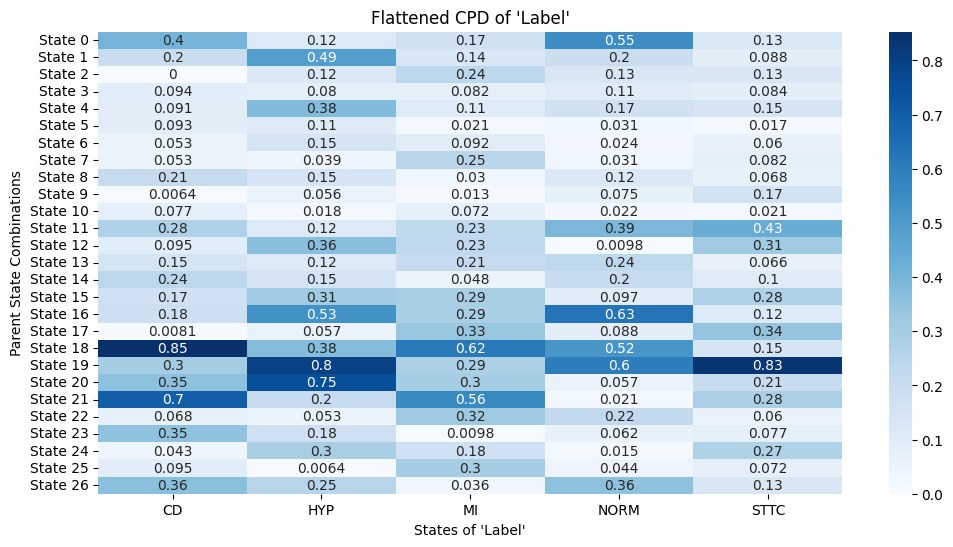

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

label_cpd = bn_model.get_cpds('Label')

cpd_data = label_cpd.values.reshape(-1, label_cpd.cardinality[0]) 

state_names = label_cpd.state_names['Label']
columns = [f"State {i}" for i in range(cpd_data.shape[0])]
df = pd.DataFrame(cpd_data, columns=state_names, index=columns)

plt.figure(figsize=(12, 6))
sns.heatmap(df, annot=True, cmap="Blues", xticklabels=state_names, yticklabels=columns)
plt.title("Flattened CPD of 'Label'")
plt.xlabel("States of 'Label'")
plt.ylabel("Parent State Combinations")
plt.show()


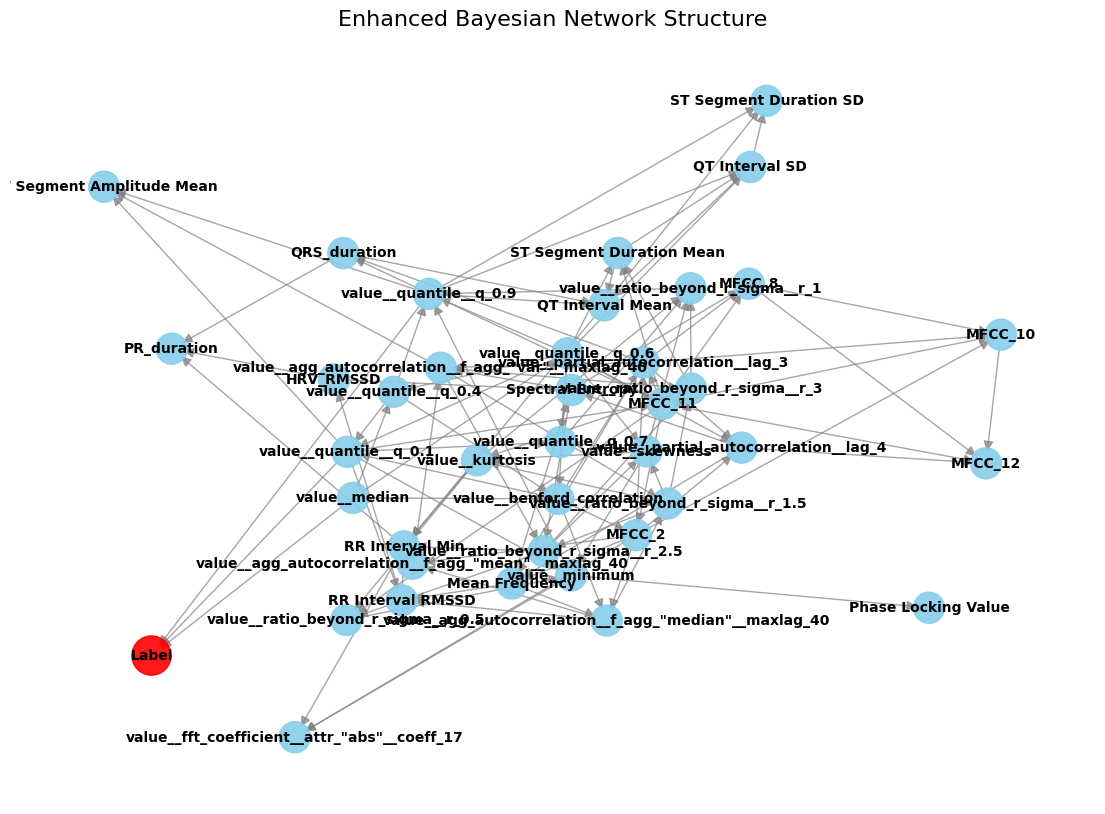

In [6]:
import matplotlib.pyplot as plt
import networkx as nx


edges = bn_model.edges()
G = nx.DiGraph()
G.add_edges_from(edges)


node_colors = ["red" if node == "Label" else "skyblue" for node in G.nodes()]
node_sizes = [800 if node == "Label" else 500 for node in G.nodes()]


pos = nx.spring_layout(G, seed=42, k=0.5, iterations=50)

plt.figure(figsize=(14, 10))
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.9)
nx.draw_networkx_edges(G, pos, edge_color="gray", arrowsize=15, alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

plt.title("Enhanced Bayesian Network Structure", fontsize=16)
plt.axis("off")
plt.show()


+-------------+--------------+
| Label       |   phi(Label) |
+=============+==============+
| Label(CD)   |       0.1549 |
+-------------+--------------+
| Label(HYP)  |       0.0596 |
+-------------+--------------+
| Label(MI)   |       0.1902 |
+-------------+--------------+
| Label(NORM) |       0.4425 |
+-------------+--------------+
| Label(STTC) |       0.1528 |
+-------------+--------------+


/tmp/ipykernel_1826956/883539290.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=posterior, palette="viridis")


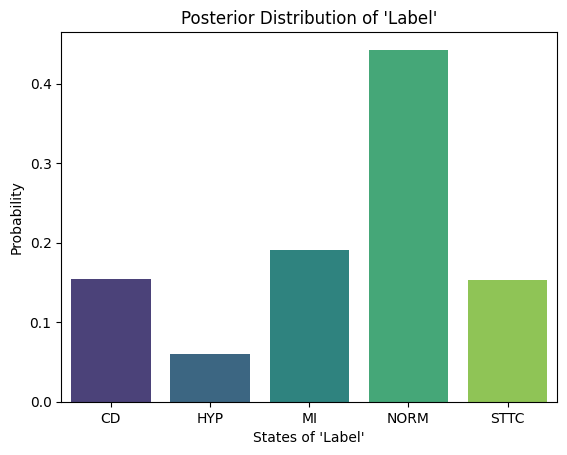

In [7]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(bn_model)


query = infer.query(variables=['Label'], evidence={'PR_duration': 'High'})
print(query)
posterior = query.values
labels = bn_model.get_cpds('Label').state_names['Label']
sns.barplot(x=labels, y=posterior, palette="viridis")
plt.title("Posterior Distribution of 'Label'")
plt.xlabel("States of 'Label'")
plt.ylabel("Probability")
plt.show()



In [8]:

target_node = "Label"
paths = nx.single_target_shortest_path(G, target_node)
print(f"Paths to {target_node}:")
for node, path in paths.items():
    print(f"Path from {node}: {path}")


Paths to Label:
Path from Label: ['Label']
Path from value__quantile__q_0.9: ['value__quantile__q_0.9', 'Label']
Path from value__quantile__q_0.1: ['value__quantile__q_0.1', 'Label']
Path from value__median: ['value__median', 'Label']
Path from value__ratio_beyond_r_sigma__r_1: ['value__ratio_beyond_r_sigma__r_1', 'value__quantile__q_0.9', 'Label']
Path from value__minimum: ['value__minimum', 'value__quantile__q_0.9', 'Label']
Path from value__quantile__q_0.6: ['value__quantile__q_0.6', 'value__quantile__q_0.9', 'Label']
Path from value__quantile__q_0.4: ['value__quantile__q_0.4', 'value__quantile__q_0.9', 'Label']
Path from value__benford_correlation: ['value__benford_correlation', 'value__quantile__q_0.1', 'Label']
Path from value__ratio_beyond_r_sigma__r_3: ['value__ratio_beyond_r_sigma__r_3', 'value__ratio_beyond_r_sigma__r_1', 'value__quantile__q_0.9', 'Label']
Path from value__kurtosis: ['value__kurtosis', 'value__ratio_beyond_r_sigma__r_1', 'value__quantile__q_0.9', 'Label']
Pat

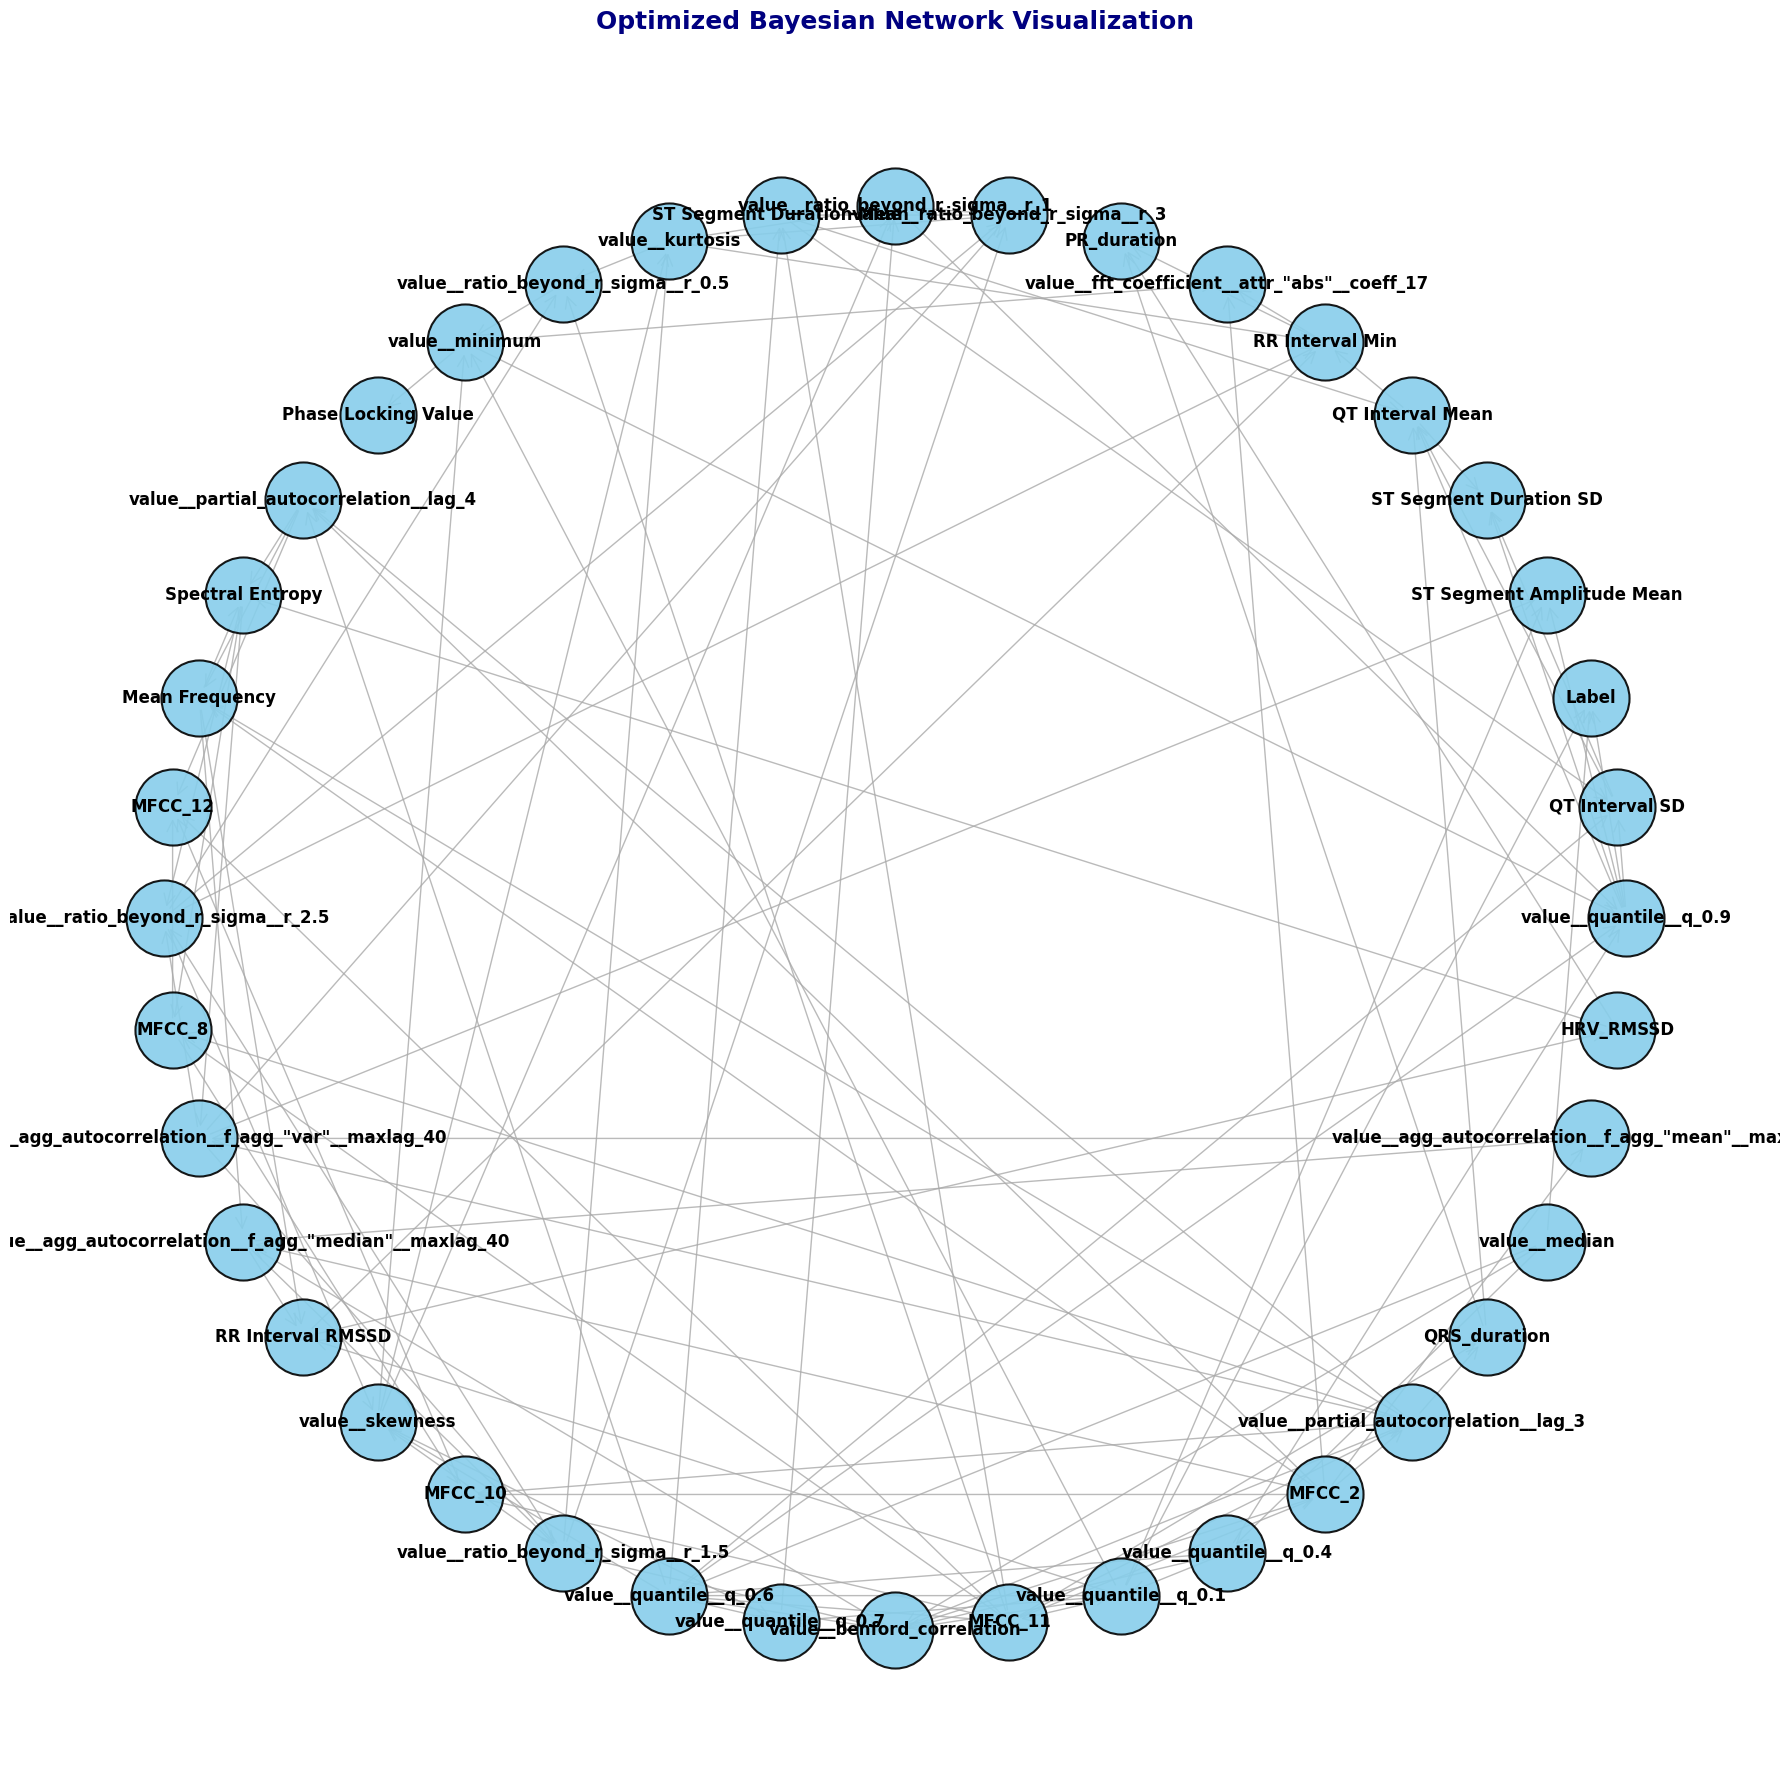

In [9]:

import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from(bn_model.edges()) 

pos = nx.circular_layout(G)

plt.figure(figsize=(18, 18))

nx.draw_networkx_nodes(
    G,
    pos,
    node_size=3000,
    node_color="skyblue",
    edgecolors="black",
    linewidths=1.5,
    alpha=0.9
)
nx.draw_networkx_edges(
    G,
    pos,
    arrowstyle="->",
    arrowsize=20,
    edge_color="darkgray",
    alpha=0.8
)

nx.draw_networkx_labels(
    G,
    pos,
    font_size=12,
    font_weight="bold",
    font_color="black"
)
edge_labels = {(u, v): "" for u, v in G.edges()}
nx.draw_networkx_edge_labels(
    G,
    pos,
    edge_labels=edge_labels,
    font_size=8,
    font_color="darkblue",
    label_pos=0.3
)

plt.title(
    "Optimized Bayesian Network Visualization",
    fontsize=18,
    fontweight="bold",
    color="navy",
    pad=20
)

plt.axis("off")
plt.tight_layout()
plt.show()
